<a href="https://colab.research.google.com/github/kauefs/ML/blob/%40/notebooks/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><a href=https://sigmoidal.ai/><img alt=SigMoidal src=https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_escuro.png width=50%></a></center>

<center><a href=https://sigmoidal.ai/><img src=https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/eds.png></a></center>

$$10\ October\ 2024$$

---
[![ƊⱭȾɅViƧi🧿Ƞ](https://img.shields.io/badge/ƊⱭȾɅViƧi🧿Ƞ&trade;-0065FF?style=plastic)](https://datavision.one/)
[![GitHub](  https://img.shields.io/badge/-000000?logo=github&logoColor=FFFFFF)](https://github.com/kauefs/)
[![Medium](  https://img.shields.io/badge/-000000?logo=medium&logoColor=FFFFFF)](https://medium.com/@kauefs)
[![LinkedIn](https://img.shields.io/badge/-0077B5?logo=linkedin&logoColor=FFFFFF)](https://www.linkedin.com/in/kauefs/)
[![Python](  https://img.shields.io/badge/-3-4584B6?logo=python&logoColor=FFDE57&labelColor=4584B6&color=646464)](https://www.python.org/)
[![License]( https://img.shields.io/badge/Apache--2.0-D22128?style=flat&logo=apache&logoColor=CB2138&label=License&labelColor=6D6E71&color=D22128)](https://www.apache.org/licenses/LICENSE-2.0)

<center>
    <img src=https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/embedding.gif>
</center>

# Deep Learning **&** Fashion

**[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist):** standard DataSet used in Deep Learning **&** Computer Vision, DataSet containing 70**,**000 GrayScale images in 10 categories, showing individual articles of clothing at low resolution **(**28 by 28 pixels**)**. On the DataSet 60**,**000 images are used to train the network **&** 10**,**000 images are used to evaluate how accurately the network learned to classify images.

Apesar de trazer imagens já pré**-**processadas, representa bom desafio para aplicar redes neurais profundas, servindo, especificamente, para demonstrar um tipo especial das redes neurais, as redes neurais convolucionais **(**Convolutional Neural NetWorks **–** CNN**)**.

<center>
<img src=https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png>
<figcaption>Fashion-MNIST Samples by <a href=https://github.com/zalandoresearch/fashion-mnist>Zalando</a> – MIT License</figcaption>
</center>

Loading the dataset returns four NumPy arrays**:**

* *trainImages* **(**`X`**)** **&** *trainLabels* **(**`Y`**)** arrays are the Training Set **–** the data the model uses to learn;
* The model is tested against the Test Set**:** *testImages* **(**`x`**)** **&** *testLabels* **(**`y`**)** arrays.

Images are 28**×**28 NumPy arrays, with pixel values ranging from 0 to 255. *Labels* are an array of integers, ranging from 0 to 9, corresponding to the *class* of clothing the image represents, with each image mappend to a single *label*.

Cada imagem pertence exclusivamente a uma única classe, havendo 10 *labels* possíveis, conforme [documentação](https://github.com/zalandoresearch/fashion-mnist) do Fashion MNIST**:**

<table>
  <tbody>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
  </tbody>
</table>

Este DataSet foi criado em substituição ao MNIST tradicional, em que as imagens eram puramente de dígitos manuscritos, sendo muito fácil, uma vez que CNN conseguiam atingir tranquilamente acurácia de 99**.**7**%**, não representando mais os desafios modernos de Visão Computacional.

Fashion MNIST is intended as a drop**-**in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) DataSet, often used as the **"**Hello**,** World**!"** of Machine Learning programs for Computer Vision, which contained images of HandWritten digits **(**0, 1, 2, etc.**)** in a format identical to that of the articles of clothing of the Fashion MNIST, which has more variety, and it is slightly more challenging than the regular MNIST. Both DataSets are relatively small and are used to verify that an algorithm works as expected. They are good starting points to test and to debug code.

The DataSet may be imported **&** loaded directly from [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) or from [GitHub](https://github.com/zalandoresearch/fashion-mnist).

Apesar desse conjunto de dados vir previamente processado **&** bem documentado, explorar**-**se**-**á, rapidamente, para aumentar a consciência situacional **(**InSights**)** a respeito do DataSet, verificando a dimencionalidade de 28**×**28 *pixels* em tons de cinza **(**1 canal de cor**)**, sendo o valor de cada *pixel* compreendido entre 0 **&** 255, bem como verificar**-**se**-**á se os DataSets de Treino e de Teste estão adequadamente balanceados, contendo proporção ideal entre as diferentes classes.

## Pré**-**Processamento dos Dados

Antes de se criar o modelo e de treinar a rede neural, há algumas etapas de pré**-**processamento.

### Normalizando *pixels*

A intensidade dos *pixels* devem ser normalizadas, isto é, valores inteiros devem ser convertidos para `float`, dentro do intervalo $[0, 1]$. Como o valor máximo do *pixel* é 255, basta dividir todos os *pixels* individuais por 255**.**0.

### Redimensionando Imagens

O primeiro *layer* convolucional espera um único tensor contendo todos os *pixels*. O TensorFlow espera uma única lista com 4 dimensões, e não 60**,**000 itens de dimensões 28**×**28**×**1, como é o caso do DataSet de Treino **(**o mesmo vale para os dados de teste**)**.

### One-Hot Encoding

Os *labels* já estão codificados entre 0 **&** 9 **(**_Integer Encoding_**)**, sendo possível utilizar diretamente `y_train` **&** `y_test`, desde que se use `loss='sparse_categorical_crossentropy'`. No entanto, utilizá**-**los diretamente pode levar o modelo de Deep Learning a entender que há relação natural de ordem entre os *labels*, o que não é verdade, podendo levar a desempenho inferior.

Para variáveis categóricas em que não há relação ordinal, prefere**-**se usar o método One**-**Hot Encoding **–** [diferenças entre essas duas técnicas](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).

## Definindo uma Rede Neural Convolucional

Existem diversas arquiteturas consagradas de CNN. Para este projeto, utilizar**-**se**-**á uma arquitetura simplificada da VGGNet, implementada em artigo do Cientista de Dados Adrian RoseBroke, adaptada para adequar as dimensões 28**×**28 das imagens e permitir o uso do Keras.

Uma vez com os *labels* estando *one**-**hot encoded*, utilizar**-**se**-**á `loss='categorical_crossentropy'` para compilar o modelo, bem como separados dados para validação na proporção de 1**/**3.

Before the model is ready for training, it needs some settings, added during [*compiling*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)**:**

* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)**:** how the model is updated based on data and the loss function;
* [*Loss Function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses)**:** measures how accurate the model is during training; to be minimized in order to **"**steer**"** the model in the right direction;
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)**:** used to monitor training **&** testing steps; *Accuracy* shows the fraction of the images that are correctly classified.

## Model Training

Training a neural network model requires the following steps**:**

1. Feeding training data to the model **–** *trainImages* **(**`X`**)** **&** *trainLabels* **(**`Y`**)** arrays;
2. The model learns to associate images **&** labels;
3. The model make predictions about the Test Set **—** *testImages* **(**`x`**)** array;
4. Verifying predictions match labels from *testLabels* **(**`y`**)** array.

### Making Predictions

With the model trained, it can be used to make predictions about some images.

A SoftMax Layer is attached to convert the model**'**s linear OutPuts **–** [logits](https://developers.google.com/machine-learning/glossary#logits) **–** to probabilities, which are easier to interpret.

## Avaliação

It turns out Accuracy on the Test DataSet is a little less than Accuracy on the Training DataSet, representing [*OverFitting*](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting) **(**[Strategies to Prevent OverFitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)**)**, that happens when a machine learning model performs worse on new, previously unseen, InPuts than it does on the Training Data, **"**memorizing**"** the noise and the details in the Training DataSet to a point where it negatively impacts the performance of the model on new data.

No geral, o modelo atingiu Acurácia de 88**.**88**%** para os dados de treino e de 88**.**88**%** para os dados de validação. Não obstante, não teve bom desempenho para a categoria `camisa`, o que, eventualmente pode ser melhorado com técnicas de Data Augmentation.

Observando as curvas  `accuracy` **&** `val_accuracy`, identifica**-**se talvez pequeno OverFitting, mas que não prejudica muito o desempenho da CNN perante os dados de validação, uma vez que a acurácia no DataSet de teste se mantém muito boa, significando que o modelo é genérico o suficiente para lidar com dados novos.

* [TensorFlow**–**Keras Classification Tutorial](https://www.tensorflow.org/tutorials/keras/classification)

In [ ]:
# Importing Libraries:
import itertools
import            numpy      as   np
import            pandas     as   pd
import matplotlib.pyplot     as   plt
import           seaborn     as   sns
from   tensorflow          import keras
from        keras.datasets import fashion_mnist
from        keras.models   import Sequential
from        keras.losses   import SparseCategoricalCrossentropy
from        keras.layers   import Input, Conv2D, BatchNormalization, GlobalAveragePooling2D, MaxPooling2D, Dropout, Flatten, Dense, Softmax
from      sklearn.metrics  import classification_report, confusion_matrix, ConfusionMatrixDisplay
from   matplotlib.ticker   import MaxNLocator
# Visualization Config:
%matplotlib inline
%config InlineBackend.figure_format='svg'
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
# print(plt.style.available)
# plt.style.use('ggplot')
# Context:   {paper   , notebook , talk  , poster}
# Style:     {darkgrid, whitegrid, dark  , white , ticks}
# Palette:   {deep    , muted    , bright, pastel, dark , colorblind}
# sns.set_theme(context='notebook', style='whitegrid', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)
# Loading Original Train (X0, Y0) & Original Test (xo, yo) DataSets:
(X0, Y0), (xo, yo) = fashion_mnist.load_data()
print('Keras:', keras.__version__)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Keras: 3.4.1


In [ ]:
# English    Labels:
class_names   = ['top'     ,'trouser','pullover','dress'  ,'coat'     ,'sandal'  ,'shirt' ,'sneaker','bag'  ,'boot']
# Portuguese Labels:
# class_names = ['camiseta','calça'  ,'suéter'  ,'vestido','sobretudo','sandália','camisa','tênis'  ,'bolsa','bota']
# Creating Validation Data:
xx, X=   X0[50000:]      ,X0[:50000]#/255.
yy, Y=   Y0[50000:]      ,Y0[:50000]
# DataFrame Dimensionalities:
print('DataFrames Dimensionalities:\n',
      '\n X:{}'.format(X.shape), '\nxx:{}'.format(xx.shape), '\nxo:{}'.format(xo.shape),
      '\n Y:{}'.format(Y.shape), '\nyy:{}'.format(yy.shape), '\nyo:{}'.format(yo.shape))
# print('X:', X.shape)
# print('Y:', Y.shape)  # len(Y)
# print('x:', x.shape)
# print('y:', y.shape)  # len(y)
# Verifying some Image Slice:
print('\nArray Converted Image Sample:\n', X[7][:5][:5])

DataFrames Dimensionalities:
 
 X:(50000, 28, 28) 
xx:(10000, 28, 28) 
xo:(10000, 28, 28) 
 Y:(50000,) 
yy:(10000,) 
yo:(10000,)

Array Converted Image Sample:
 [[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]]


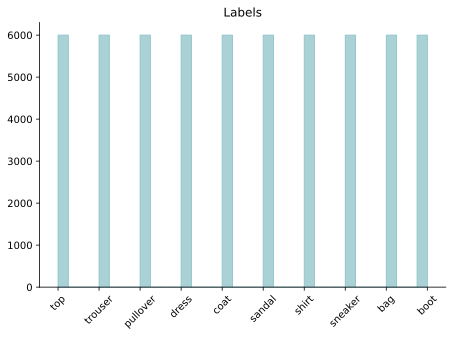

In [ ]:
# Classes:
t      =   range(len(class_names))
labels =             class_names
def ticks(value, position):
    if int(value) in t    : return   labels[int(value)]
    else                  : return ''
# for i in range(len(class_names)): print(class_names[i],'\t\t', preds[i])
fig, ax= plt.subplots(   )
# plot    = sns.histplot(Y0)
# for bin_,i in zip(plot.patches, sns.color_palette('Set3', 10)) : bin_.set_facecolor(i)
sns.color_palette('muted')
sns.histplot(Y0, color='#8DC3C8', edgecolor='#8DC3C8')
sns.despine(             )
ax.xaxis.set_major_formatter(ticks)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Labels'       )
plt.ylabel(None          )
plt.xticks(rotation= 45  )
plt.tight_layout(        )
plt.show(                )

In [ ]:
# Lambda Function to Normalize Pixels & Convert to Float32:
f = lambda x: (x/255.).astype('float32')
# Applying to  X (train) & xx (validation) & x (test):
X =  f(X ) #X =  X/255.
xx=  f(xx) #xx= xx/255.
x =  f(xo) #xo= xo/255.
# Image ReShape:
X = X.reshape(( X.shape[0],  28, 28, 1))
xx=xx.reshape((xx.shape[0],  28, 28, 1))
x = x.reshape(( x.shape[0],  28, 28, 1))
# Y = Y.reshape(( Y.shape[0],           ))
# yy=yy.reshape((yy.shape[0],           ))
# y =yo.reshape((yo.shape[0],           ))
print(' X:{}'.format(X.shape), '\nxx:{}'.format(xx.shape), '\n x:{}'.format( x.shape),
    '\n Y:{}'.format(Y.shape), '\nyy:{}'.format(yy.shape), '\nyo:{}'.format(yo.shape))

 X:(50000, 28, 28, 1) 
xx:(10000, 28, 28, 1) 
 x:(10000, 28, 28, 1) 
 Y:(50000,) 
yy:(10000,) 
yo:(10000,)


In [ ]:
# DataSet Unique Values per Class:
print(' Y:'  , np.unique(Y , return_counts=True),
      '\nyy:', np.unique(yy, return_counts=True),
      '\nyo:', np.unique(yo, return_counts=True))

 Y: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([4977, 5012, 4992, 4979, 4950, 5004, 5030, 5045, 5032, 4979])) 
yy: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1023,  988, 1008, 1021, 1050,  996,  970,  955,  968, 1021])) 
yo: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


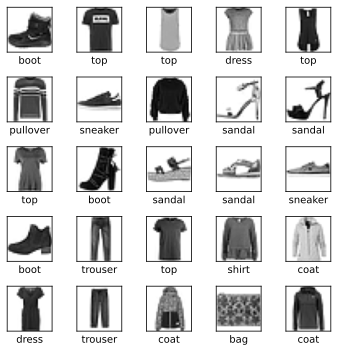

In [ ]:
# Images Sample:
plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5,  5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y[i]])
plt.tight_layout()
plt.show()

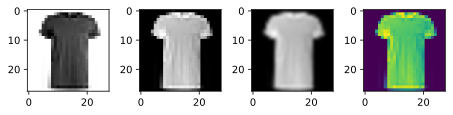

In [ ]:
# Sample Image:
fig, ax = plt.subplots(1,  4)
ax[0].imshow(X[17], cmap=plt.cm.binary)
ax[1].imshow(X[17], cmap='gray')
ax[2].imshow(X[17], cmap='gray', interpolation='bicubic')
ax[3].imshow(X[17])
ax[0].grid(False  )
ax[1].grid(False  )
ax[2].grid(False  )
ax[3].grid(False  )
plt.tight_layout( )
plt.show(         )

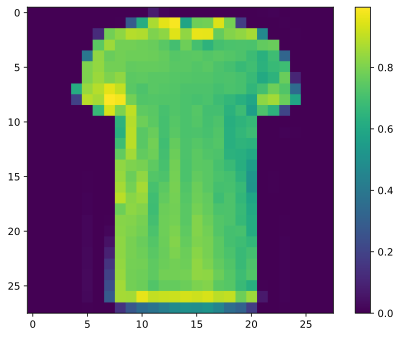

In [ ]:
# ColorBar:
plt.figure(      )
plt.imshow(X[17] )
plt.colorbar(    )
plt.grid(False   )
plt.tight_layout()
plt.show(        )

In [ ]:
# @title Model 0**:** Sequential
# ParaMeters:
n_classes  =     10
input_shape=(28, 28, 1)
# Model:
model0=Sequential([Input(shape=(28,                 28)),
                   Flatten(                            ),
                   Dense(128        , activation='relu'),
                   Dense(n_classes)],  trainable= True  , name='Model0')
# Model Architecture:
model0.summary()
# Weights:
w , b =model0.layers[1].get_weights( )
print('\tw:' , w.shape , '\n\tb:     ', b.shape)

Model: "Model0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

	w: (784, 128) 
	b:      (128,)


In [ ]:
# Model Compiling:
# model0.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model0.compile(optimizer          = 'Adam',
               loss               =  SparseCategoricalCrossentropy(from_logits=True),
               metrics            =['accuracy'],
               weighted_metrics   =  None ,
               run_eagerly        =  False,
               steps_per_execution=      1,
               jit_compile        =  None ,
               auto_scale_loss    =  True )
# Model Training:
# history0=model1.fit(X, Y, epochs=10 , validation_data=(xx, yy))
history0=model0.fit(  X, Y,
                    batch_size           = None,
                    epochs               =   10,
                    verbose              =    1,
                    callbacks            = None,
                    validation_split     =  0.0,
                    validation_data      =(xx  ,   yy),
                    shuffle              = True,
                    class_weight         = None,
                    sample_weight        = None,
                    initial_epoch        =    0,
                    steps_per_epoch      = None,
                    validation_steps     = None,
                    validation_batch_size= None,
                    validation_freq      =    1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7763 - loss: 0.6486 - val_accuracy: 0.8344 - val_loss: 0.4551
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8537 - loss: 0.4040 - val_accuracy: 0.8605 - val_loss: 0.3797
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8740 - loss: 0.3457 - val_accuracy: 0.8698 - val_loss: 0.3645
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8839 - loss: 0.3188 - val_accuracy: 0.8715 - val_loss: 0.3657
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8898 - loss: 0.3036 - val_accuracy: 0.8777 - val_loss: 0.3390
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8953 - loss: 0.2816 - val_accuracy: 0.8833 - val_loss: 0.3271
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8978 - loss: 0.2730 - val_accuracy: 0.8816 - val_loss: 0.3246
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9032 - loss: 0.2574

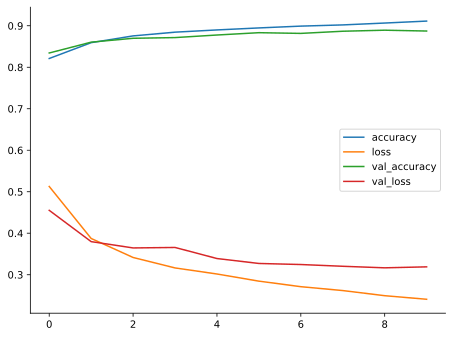

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8578 - loss: 63.5060
    Loss: 66.87
Accuracy: 85.37%


In [ ]:
# Plotting Optimization History:
pd.DataFrame(history0.history).plot()
plt.tight_layout(    )
sns.despine(         )
plt.show(            )
# Model Evaluation:
score0=model0.evaluate(xo,yo)
# Model Performance:
print('    Loss: {:.2f}'.format( score0[0]))
print('Accuracy: {:.2f}%'.format(score0[1]*100))

In [ ]:
# @title Model 1**:** Sequential
# Model:
model1=Sequential([Input(shape=(28,                  28)) ,
                   Flatten(                             ) ,
                   Dense(784      , activation='sigmoid') ,
                   Dense(n_classes, activation='softmax')], trainable=True, name='Model1')
# Model Architecture:
model1.summary()
# Weights:
w , b =model1.layers[2].get_weights()
print('\tw:' , w.shape , '\n\tb:', b.shape)

Model: "Model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

	w: (784, 10) 
	b: (10,)


In [ ]:
# Model Compiling:
# model1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.compile(optimizer          = 'sgd',
               loss               = 'sparse_categorical_crossentropy',
               metrics            =['accuracy'],
               weighted_metrics   =  None ,
               run_eagerly        =  False,
               steps_per_execution=      1,
               jit_compile        =  None ,
               auto_scale_loss    =  True )
# Model Training:
# history1=model1.fit(X, Y, epochs=10 , validation_data=(xx, yy))
history1=model1.fit(  X, Y,
                    batch_size           = None,
                    epochs               =   10,
                    verbose              =    1,
                    callbacks            = None,
                    validation_split     =  0.0,
                    validation_data      =(xx  ,   yy),
                    shuffle              = True,
                    class_weight         = None,
                    sample_weight        = None,
                    initial_epoch        =    0,
                    steps_per_epoch      = None,
                    validation_steps     = None,
                    validation_batch_size= None,
                    validation_freq      =    1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5499 - loss: 1.5641 - val_accuracy: 0.7355 - val_loss: 0.8238
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7463 - loss: 0.7764 - val_accuracy: 0.7685 - val_loss: 0.6808
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7702 - loss: 0.6655 - val_accuracy: 0.7838 - val_loss: 0.6153
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7891 - loss: 0.6045 - val_accuracy: 0.7947 - val_loss: 0.5825
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8032 - loss: 0.5654 - val_accuracy: 0.8010 - val_loss: 0.5570
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8082 - loss: 0.5508 - val_accuracy: 0.8086 - val_loss: 0.5362
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8135 - loss: 0.5360 - val_accuracy: 0.8134 - val_loss: 0.5218
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8190 - loss: 0

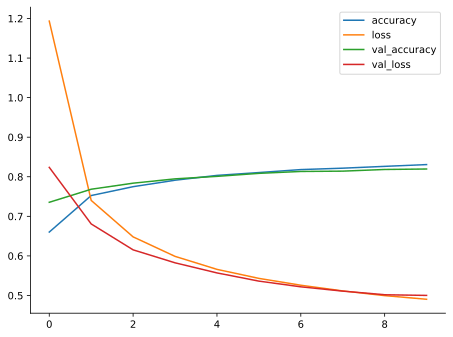

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7285 - loss: 1.8658
    Loss: 1.96
Accuracy: 71.78%


In [ ]:
# Plotting Optimization History:
pd.DataFrame(history1.history).plot()
plt.tight_layout(    )
sns.despine(         )
plt.show(            )
# Model Evaluation:
score1=model1.evaluate(xo,yo)
# Model Performance:
print('    Loss: {:.2f}'.format( score1[0]))
print('Accuracy: {:.2f}%'.format(score1[1]*100))

In [ ]:
# @title Model 2**:** Sequential
model2=Sequential([Input(shape=(28,                  28)) ,
                   Flatten(                             ) ,
                   Dense(300      , activation='relu'   ) ,
                   Dense(100      , activation='relu'   ) ,
                   Dense(n_classes, activation='softmax')], trainable=True, name='Model2')
# Model Architecture:
model2.summary()
# Weights:
w , b =model2.layers[2].get_weights()
print('\tw:' , w.shape , '\n\tb:', b.shape)

Model: "Model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

	w: (300, 100) 
	b: (100,)


In [ ]:
# Model Compiling:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Model Training:
history2=model2.fit(X, Y, epochs=10  , validation_data=(xx, yy))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7835 - loss: 0.6185 - val_accuracy: 0.8353 - val_loss: 0.4328
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8635 - loss: 0.3748 - val_accuracy: 0.8674 - val_loss: 0.3657
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8801 - loss: 0.3285 - val_accuracy: 0.8730 - val_loss: 0.3457
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8831 - loss: 0.3078 - val_accuracy: 0.8799 - val_loss: 0.3378
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8945 - loss: 0.2836 - val_accuracy: 0.8827 - val_loss: 0.3260
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8980 - loss: 0.2692 - val_accuracy: 0.8783 - val_loss: 0.3313
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9063 - loss: 0.2530 - val_accuracy: 0.8833 - val_loss: 0.3234
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9074 - loss: 0.

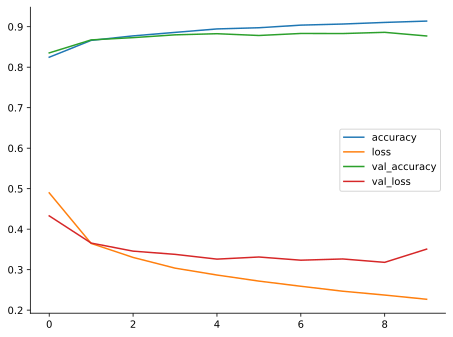

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8507 - loss: 62.8106
    Loss: 69.23
Accuracy: 84.54%


In [ ]:
# Plotting Optimization History:
pd.DataFrame(history2.history).plot()
plt.tight_layout(    )
sns.despine(         )
plt.show(            )
# Model Evaluation:
score2=model2.evaluate(xo,yo)
# Model Performance:
print('    Loss: {:.2f}'.format( score2[0]))
print('Accuracy: {:.2f}%'.format(score2[1]*100))

In [ ]:
# @title Model 3**:** CNN
# Model:
model3=Sequential([Input(shape=input_shape),
                   Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
                   Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
                   MaxPooling2D(pool_size=(2, 2)),
                   Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                   Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                   GlobalAveragePooling2D(),
                   Dropout(0.5),
                   Dense(n_classes, activation='softmax')], trainable=True, name='Model3')
# Model Architecture:
model3.summary()
# Weights:
w , b =model3.layers[7].get_weights()
print('\tw:' , w.shape , '\n\tb:', b.shape)

Model: "Model3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,642 (256.41 KB)

 Trainable params: 65,642 (256.41 KB)

 Non-trainable params: 0 (0.00 B)

	w: (64, 10) 
	b: (10,)


In [ ]:
# Model Compiling:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Model Training:
history3=model3.fit(X, Y, epochs=10  , validation_data=(xx, yy))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 79ms/step - accuracy: 0.5345 - loss: 1.2486 - val_accuracy: 0.7743 - val_loss: 0.5869
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.7559 - loss: 0.6692 - val_accuracy: 0.8246 - val_loss: 0.4968
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 78ms/step - accuracy: 0.7990 - loss: 0.5640 - val_accuracy: 0.8407 - val_loss: 0.4443
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.8279 - loss: 0.4967 - val_accuracy: 0.8623 - val_loss: 0.3882
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 81ms/step - accuracy: 0.8357 - loss: 0.4710 - val_accuracy: 0.8712 - val_loss: 0.3589
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 80ms/step - accuracy: 0.8484 - loss: 0.4317 - val_accuracy: 0.8807 - val_loss: 0.3444
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 78ms/step - accuracy: 0.8544 - loss: 0.4217 - val_accuracy: 0.8761 - val_loss: 0.3431
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 79ms/step - accuracy: 

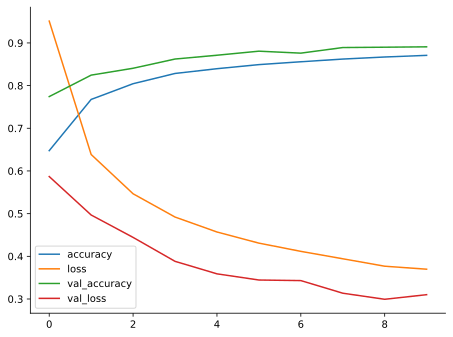

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.7203 - loss: 35.0627
    Loss: 35.21
Accuracy: 72.05%


In [ ]:
# Plotting Optimization History:
pd.DataFrame(history3.history).plot()
plt.tight_layout(    )
sns.despine(         )
plt.show(            )
# Model Evaluation:
score3=model3.evaluate(xo,yo)
# Model Performance:
print('    Loss: {:.2f}'.format( score3[0]))
print('Accuracy: {:.2f}%'.format(score3[1]*100))

In [ ]:
# @title Model 4**:** CNN
model4=Sequential([Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=input_shape),
                   MaxPooling2D(pool_size=2),
                   Dropout(0.3),
                   Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
                   MaxPooling2D(pool_size=2),
                   Dropout(0.3),
                   Flatten(),
                   Dense(256,                                        activation='relu'),
                   Dropout(0.5),
                   Dense(n_classes,                                  activation='softmax')], trainable=True, name='Model4')
# Model Architecture:
model4.summary()
# Weights:
w , b =model4.layers[7].get_weights()
print('\tw:' , w.shape , '\n\tb:', b.shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Model4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

	w: (1568, 256) 
	b: (256,)


In [ ]:
# Model Compiling:
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Model Training:
history4=model4.fit(X, Y, batch_size=64, epochs=10 , validation_data=(xx, yy))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 87ms/step - accuracy: 0.6859 - loss: 0.8519 - val_accuracy: 0.8593 - val_loss: 0.3919
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.8362 - loss: 0.4413 - val_accuracy: 0.8762 - val_loss: 0.3419
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.8605 - loss: 0.3866 - val_accuracy: 0.8812 - val_loss: 0.3230
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.8694 - loss: 0.3614 - val_accuracy: 0.8938 - val_loss: 0.2911
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.8775 - loss: 0.3298 - val_accuracy: 0.8984 - val_loss: 0.2752
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.8871 - loss: 0.3150 - val_accuracy: 0.8984 - val_loss: 0.2729
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.8909 - loss: 0.2998 - val_accuracy: 0.9013 - val_loss: 0.2619
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.8936 - loss: 0.2861 - 

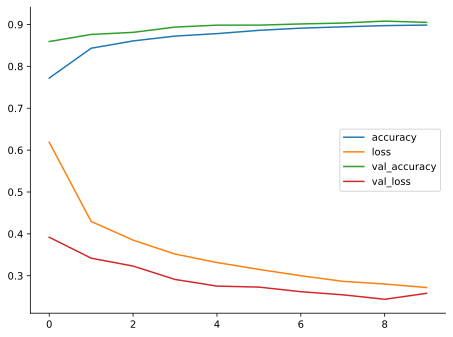

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7817 - loss: 65.8996
    Loss: 64.84
Accuracy: 78.52%


In [ ]:
# Plotting Optimization History:
pd.DataFrame(history4.history).plot()
plt.tight_layout(    )
sns.despine(         )
plt.show(            )
# Model Evaluation:
score4=model4.evaluate(xo,yo)
# Model Performance:
print('    Loss: {:.2f}'.format( score4[0]))
print('Accuracy: {:.2f}%'.format(score4[1]*100))

In [ ]:
# @title One**-**Hot Encoding
# One-Hot Encoding Sample:
sample = np.array([1, 3, 4, 2, 0])
print('Before Encoding:')
print(sample)
encoded= keras.utils.to_categorical(sample)
print('After Encoding:')
print(encoded)

Before Encoding:
[1 3 4 2 0]
After Encoding:
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
# Applying One-Hot Encoding to Labels:
Y = keras.utils.to_categorical(Y0)
#hotYY= keras.utils.to_categorical(yy)
y = keras.utils.to_categorical(yo)
# Verifying:
Y[0], yy[0], y[0]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 9,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

In [ ]:
# @title Model 5**:**  MiniVGGNet
# Adrian RoseBroke MiniVGGNet Implementation
# https://pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/
# First CONV » RELU » CONV   »   RELU » POOL Layer Set:
model5=Sequential([Input(shape=input_shape),
                   Conv2D(filters=32, kernel_size= 3,     padding='same', activation='relu'),
                   BatchNormalization(axis=1),
                   Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
                   BatchNormalization(axis=1),
                   MaxPooling2D(        pool_size=(2, 2)),
                   Dropout(0.25),
# Second CONV » RELU » CONV  »   RELU » POOL Layer Set:
                   Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
                   BatchNormalization(axis=1),
                   Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
                   BatchNormalization(axis=1),
                   MaxPooling2D(        pool_size=(2, 2)),
                   Dropout(0.25),
# First (and only) Set of FC »   RELU        Layer:
                   Flatten(),
                   Dense(512,                                             activation='relu'),
                   BatchNormalization(),
                   Dropout(0.5),
# SoftMax Classifier:
                   Dense(n_classes, activation='softmax')], trainable=True, name='Model5')
# Model Architecture:
model5.summary()
# Weights:
w , b =model5.layers[13].get_weights()
print('\tw:' , w.shape , '\n\tb:', b.shape)

Model: "Model5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │              56 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │              56 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,678,650 (6.40 MB)

 Trainable params: 1,677,458 (6.40 MB)

 Non-trainable params: 1,192 (4.66 KB)

	w: (3136, 512) 
	b: (512,)


In [ ]:
# Model Compilation:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Model Training History:
history5=model5.fit(X, Y, epochs=10  , validation_split=.3)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 222s 198ms/step - accuracy: 0.7576 - loss: 0.7480 - val_accuracy: 0.8680 - val_loss: 0.3826
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 262s 198ms/step - accuracy: 0.8696 - loss: 0.3710 - val_accuracy: 0.9033 - val_loss: 0.2798
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 265s 201ms/step - accuracy: 0.8924 - loss: 0.2964 - val_accuracy: 0.9011 - val_loss: 0.2896
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 260s 199ms/step - accuracy: 0.8980 - loss: 0.2755 - val_accuracy: 0.9109 - val_loss: 0.2500
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 261s 198ms/step - accuracy: 0.9007 - loss: 0.2695 - val_accuracy: 0.9206 - val_loss: 0.2266
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 262s 198ms/step - accuracy: 0.9103 - loss: 0.2421 - val_accuracy: 0.9209 - val_loss: 0.2238
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 263s 199ms/step - accuracy: 0.9152 - loss: 0.2324 - val_accuracy: 0.9241 - val_loss: 0.2119
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 265s 202ms/step - ac

In [ ]:
# Predictions:
pred   =model5.predict(x)
classes=np.argmax(pred ,          axis =1)
print(classification_report(yo, classes  , target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step
              precision    recall  f1-score   support

         top       0.89      0.87      0.88      1000
     trouser       0.99      0.99      0.99      1000
    pullover       0.90      0.84      0.87      1000
       dress       0.88      0.96      0.92      1000
        coat       0.83      0.92      0.87      1000
      sandal       0.98      0.99      0.99      1000
       shirt       0.82      0.73      0.77      1000
     sneaker       0.96      0.98      0.97      1000
         bag       0.99      0.98      0.98      1000
        boot       0.99      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



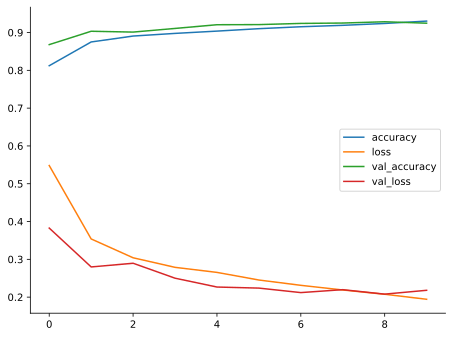

In [ ]:
# Optimization History Plot:
pd.DataFrame(history5.history).plot(     )
sns.despine(         )
plt.tight_layout(    )
plt.show(            )

In [ ]:
# Model Evaluation:
# x  =x.reshape((x.shape[0],  28, 28))
score5=model5.evaluate(x  ,     y)
# Model Performance:
print('    Loss: {:.2f}'.format( score5[0]))
print('Accuracy: {:.2f}%'.format(score5[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.9232 - loss: 0.2249
    Loss: 0.22
Accuracy: 92.19%


In [ ]:
# @title Predictions
# Probability Model:
prob =Sequential([model0, Softmax()])
# Predicting Label for Each Image on Test Set:
pred =prob.predict( xo  )  # yHat
print(np.argmax(pred[0]))
pred[0]
# Prediction: Array of 10 Numbers (Probabilities), representing the Confidence corresponding to each Label (Highest Confidence Value).

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
9


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

In [ ]:
# Verifying (Test Label):
yo[0]

9

In [ ]:
# @title Classification Report
# Testing Model Using testX and Storing the output in predY:
probs     =   model0.predict(x)
preds     =       np.argmax(probs, axis=1)
print(classification_report( yo  , preds, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

         top       0.80      0.88      0.84      1000
     trouser       0.99      0.97      0.98      1000
    pullover       0.85      0.73      0.78      1000
       dress       0.91      0.87      0.89      1000
        coat       0.74      0.88      0.80      1000
      sandal       0.98      0.96      0.97      1000
       shirt       0.71      0.66      0.69      1000
     sneaker       0.95      0.93      0.94      1000
         bag       0.99      0.95      0.97      1000
        boot       0.93      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Confusion Matrix:
 [[883   1  10  19   5   0  77   1   4   0]
 [  3 969   1  20   4   0   3   0   0   0]
 [ 19   1 726   4 161   0  89   0   0   0]
 [ 30   6  12 869  53   0  27   0   3   0]
 [  1   1  43  17 879   0  59   0   0   0]
 [  0   0   0   1   0 963   0  19   1  16]
 [160   0  63  26  83   0 663   0   5   0]
 [  0   0   0   0   0  14   0 931   0  55]
 [ 10   0   3   3   8   4  11   9 952   0]
 [  0   0   0   0   0   6   1  24   0 969]]

Confusion Matrix WithOut Normalization:



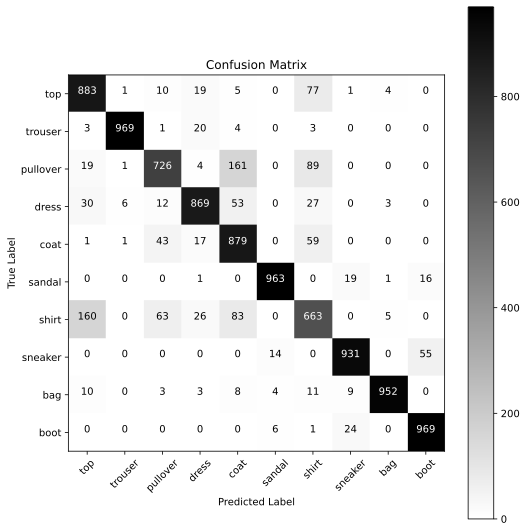

In [ ]:
# @title Confusion Matrix
# Confusion Matrix: Performance Measurement for Machine Learning Classification.
# A Table for Evaluating Performance of Classification Model
def PlotCM(cm, classes,
           normalize  = False             ,
           title      ='Confusion Matrix' ,
           cmap       =plt.cm.binary)     :
    plt.figure(figsize=(7.5,7.5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,   classes,   rotation=45  )
    plt.yticks(tick_marks,   classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:  ,  np.newaxis]
        print('\nNormalized Confusion Matrix:\n')
    else:
        print('\nConfusion Matrix WithOut Normalization:\n')
    threshold=cm.max()/2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment='center', color='#FFFFFF' if cm[i, j] > threshold else '#000000')
    plt.tight_layout(             )
    plt.ylabel('True Label'       )
    plt.xlabel('Predicted Label'  )
# Confusion Matrix to Compare testY & predY:
cm     =confusion_matrix(yo ,preds)
print( 'Confusion Matrix:\n',cm   )
PlotCM(cm,classes=class_names     )

In [ ]:
# DataFrame for Array-Formatted Confusion Matrix (Easier for Plotting):
# Normalization:
cm=cm.astype('float')/cm.sum(axis=1)[:,      np.newaxis]
df=pd.DataFrame(cm, index=class_names , columns=class_names)
df

,top,trouser,pullover,dress,coat,sandal,shirt,sneaker,bag,boot
top,0.883,0.001,0.010,0.019,0.005,0.000,0.077,0.001,0.004,0.000
trouser,0.003,0.969,0.001,0.020,0.004,0.000,0.003,0.000,0.000,0.000
pullover,0.019,0.001,0.726,0.004,0.161,0.000,0.089,0.000,0.000,0.000
dress,0.030,0.006,0.012,0.869,0.053,0.000,0.027,0.000,0.003,0.000
coat,0.001,0.001,0.043,0.017,0.879,0.000,0.059,0.000,0.000,0.000
sandal,0.000,0.000,0.000,0.001,0.000,0.963,0.000,0.019,0.001,0.016
shirt,0.160,0.000,0.063,0.026,0.083,0.000,0.663,0.000,0.005,0.000
sneaker,0.000,0.000,0.000,0.000,0.000,0.014,0.000,0.931,0.000,0.055
bag,0.010,0.000,0.003,0.003,0.008,0.004,0.011,0.009,0.952,0.000
boot,0.000,0.000,0.000,0.000,0.000,0.006,0.001,0.024,0.000,0.969


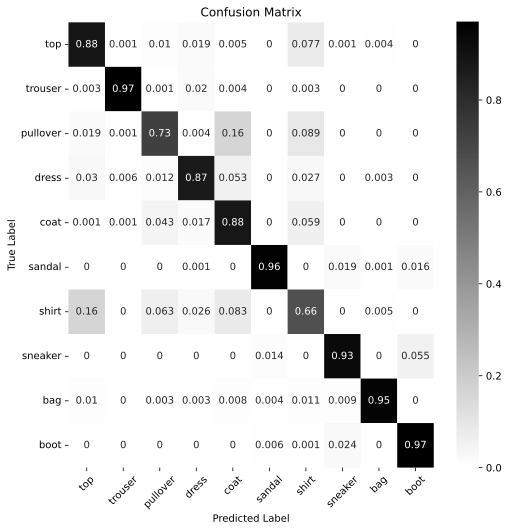

In [ ]:
# Simpler Normalized Confusion Matrix:
plt.figure(figsize=(7.5, 7.5))
sns.heatmap(df,   annot=True , cmap=plt.cm.binary)
plt.title( 'Confusion Matrix')
plt.ylabel(      'True Label')
plt.xlabel( 'Predicted Label')
plt.xticks(rotation= 45      )
plt.yticks(rotation=360      )
plt.tight_layout(            )
plt.show(                    )

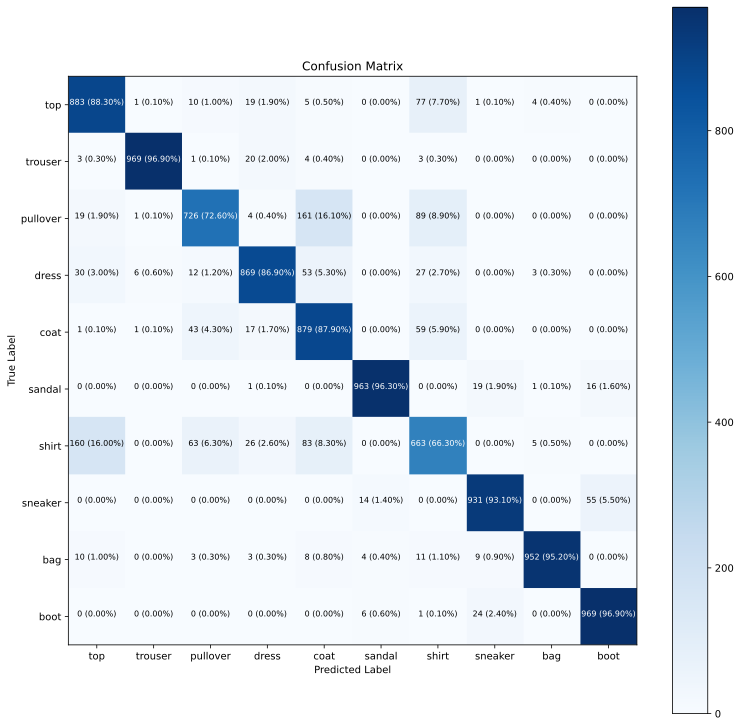

In [ ]:
# Complex Confusion Matrix:
# https://www.kaggle.com/code/niteshyadav3103/image-classification-with-ann
def CM(trueY, predY, classes=None, figsize=(10.5, 10.5), text_size=10):
    '''
    Plot Labelled Confusion Matrix Comparing Predictions & Truth Labels.
    If classes is passed, confusion matrix will be labelled,
    otherwise integer class values will be used.
    Args:
        trueY:     array of truth labels (must be same shape as predY);
        predY:     array of predicted labels (must be same shape as trueY);
        classes:   array of class labels (string form); if `None`, integer labels are used;
        figsize:   size  of output figure (default=(7.5, 7.5));
        text_size: size  of output figure text (default=13).
    Returns: labelled confusion matrix plot comparing trueY & predY.
    Example:
        CM(trueY    =test_labels,   # ground truth test labels
        predY    =   y_pred  ,   # predicted labels (y_hat)
        classes  =class_names,   # array of class label names
        figsize  =(10.5,10.5),
        text_size= 10)
    '''
    # Creating Confustion Matrix:
    cm=confusion_matrix(trueY, predY)
    norm     =cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]   # normalization
    n_classes=cm.shape[0]                        # finding the number of classes
    # Plotting Figure:
    fig, ax  =plt.subplots(figsize=figsize)
    cax= ax.matshow(cm, cmap=plt.cm.Blues)  # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)
    plt.grid(False)
    # List of Classes
    if classes: labels=classes
    else      : labels=np.arange(cm.shape[0])
    # Axes Labels:
    ax.set(title  =  'Confusion Matrix',
            xlabel=   'Predicted Label',
            ylabel=        'True Label',
            xticks=np.arange(n_classes),    # create enough axis slots for each class
            yticks=np.arange(n_classes),
            xticklabels=labels,             # Label Axes with Class Names (if they exist) or ints
            yticklabels=labels)
    # Bottom xAxis Labels:
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()
    # Set ThresHold for Different Colors:
    threshold=(cm.max()+cm.min())/2.
    # Plotting Text on Cells:
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({norm[i, j]*100:.2f}%)', horizontalalignment='center',
                color='#FFFFFF'      if cm[i, j]>  threshold else '#000000', size=text_size)
CM(trueY=yo, predY=preds, classes=class_names,figsize=(12.75, 12.75),   text_size=8)

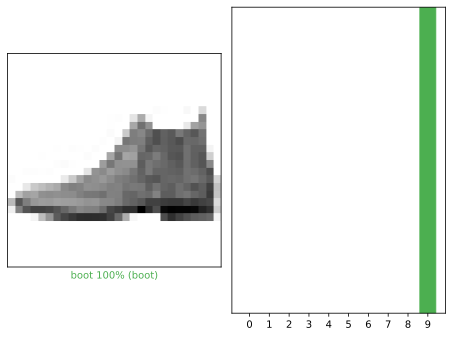

In [ ]:
# @title Predictions
# Plotting the Full Set of 10 Class Predictions:
def PlotIMG( i, predArray, trueLabel,    img):
    trueLabel , img      = trueLabel[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predLabel    = np.argmax(predArray)
    if predLabel == trueLabel:           color='#4CAF50'
    else                     :           color='#FF103F'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predLabel] , 100*np.max(predArray),
                                         class_names[trueLabel]),  color=color)
def PlotArray(i, predArray, trueLabel   ):
    trueLabel             = trueLabel[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    plot=plt.bar(range(10), predArray,   color='#C0C0C0')
    plt.ylim([0, 1])
    predLabel  =  np.argmax(predArray   )
    plot[predLabel ].set_color('#FF103F')
    plot[trueLabel ].set_color('#4CAF50')
# Correct prediction labels are green/gray and incorrect prediction labels are red/black.
# The number gives the percentage for the predicted label.
i  =0
plt.figure()
plt.subplot(1,2,1)
PlotIMG(  i, pred[i], yo, xo)
plt.subplot(1,2,2)
PlotArray(i, pred[i], yo)
plt.tight_layout()
plt.show(        )

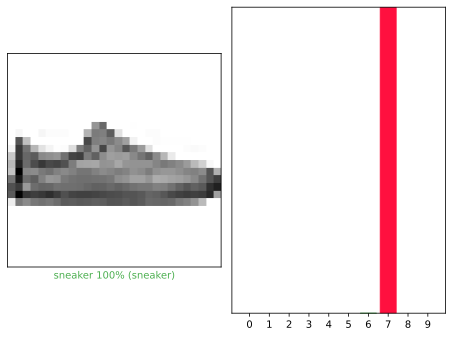

In [ ]:
i  =12
plt.figure(      )
plt.subplot(1,2,1)
PlotIMG(  i, pred[i], yo, xo)
plt.subplot(1,2,2)
PlotArray(i, pred[i], yy    )
plt.tight_layout()
plt.show(        )

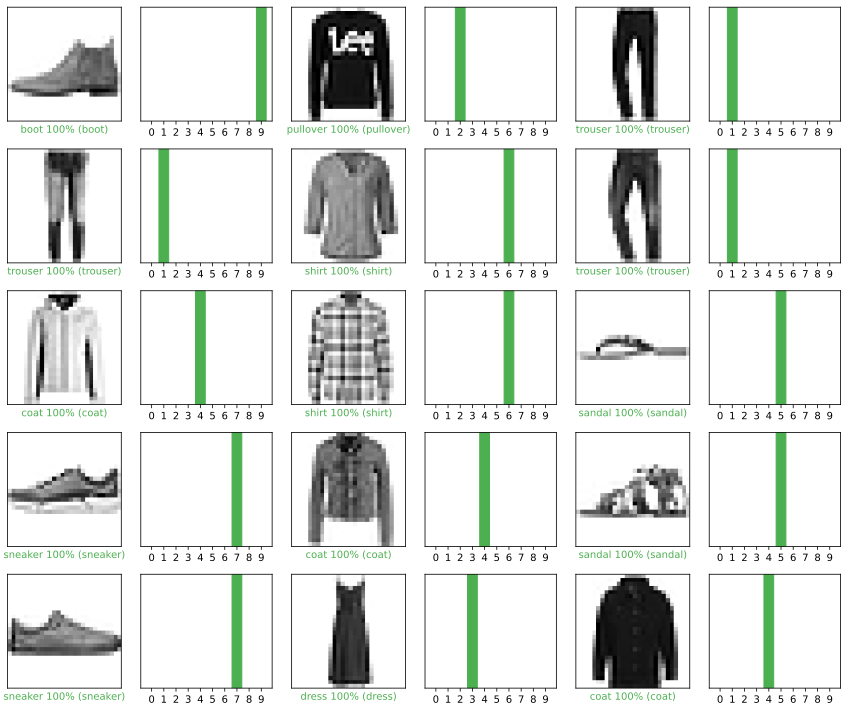

In [ ]:
# Plotting Several Imagens with  Their Predictions: the first X test images, their predicted labels, and the true labels.
# Correct Predictions: blue; Incorrect Predictions: red.
rows=      5
cols=      3
imgs= rows * cols
plt.figure(figsize=(2*2*cols, 2*rows))
for i in range(imgs):
    plt.subplot(rows, 2*cols, 2*i+1)
    PlotIMG(  i,pred[i], yo ,   xo )
    plt.subplot(rows, 2*cols, 2*i+2)
    PlotArray(i,pred[i], yo        )
plt.tight_layout(  )
plt.show(          )

In [ ]:
# Model Testing:
img=xo[1]
img.shape

(28, 28)

In [ ]:
'''
Keras Models are optimized to make predictions on a batch, or collection, of examples at once;
accordingly, even when using a single image, it needs to be added to a list.
'''
# Adding Image to a One Member Batch:
img =( np.expand_dims(img, 0))
print(img.shape )

(1, 28, 28)


In [ ]:
# Single Prediction:
single = prob.predict(img)
single

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Label: 2 



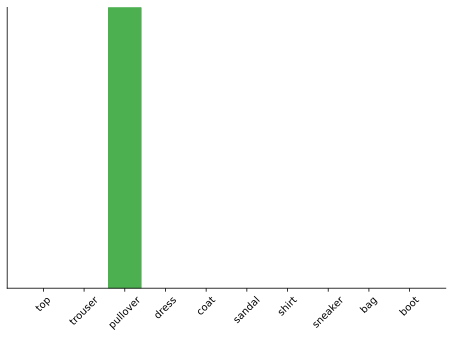

In [ ]:
print('Label:', np.argmax(single[0]) ,'\n'        )
PlotArray(1,   single[0], yo                      )
_  =plt.xticks(range(10), class_names, rotation=45)
plt.tight_layout(      )
sns.despine(           )
plt.show(              )